<a href="https://colab.research.google.com/github/JhonasVoc/introducao-a-data-science/blob/master/SQLAlchemy_Meteora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Alt text: Slogan da Meteora.](https://i.imgur.com/VDYh2G1.png)

# 1. Estruturando a tabela

In [ ]:
pip install --upgrade matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 79.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


**Meteora** é uma loja que vende roupas e acessórios de diversas marcas por todos os estados do Brasil, para entender suas bases de dados e exibir informações relevantes com o objetivo de auxiliar suas tomadas de decisão.

In [ ]:
import pandas as pd
import matplotlib as plt
from sqlalchemy import create_engine, inspect, text

**Sobre as tabelas**

* itens_pedidos: tabela que informa sobre o que foi vendido, vai ter informação o preço, quantidade, para onde vai ser enviado e o frete do pedido
* pedidos: vai falar sobre a venda feita, tendo informação sobre os vendedores, preço do pedido e a data da venda
* produtos: informa características dos produtos que são comercializados na loja
* vendedores: informa o nome dos vendedores.

In [ ]:
url_itens_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/itens_pedidos.csv'
url_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/pedidos.csv'
url_produto = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/produtos.csv'
url_vendedores = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/vendedores.csv'

In [ ]:
itens_pedidos = pd.read_csv(url_itens_pedidos)
pedidos = pd.read_csv(url_pedidos)
produto = pd.read_csv(url_produto)
vendedores = pd.read_csv(url_vendedores)

In [ ]:
# criando uma engine na memória local ( objeto de conexão)


In [ ]:
engine = create_engine('sqlite:///:memory:')

## adicionando as tabelas ao nosso sqlite

In [ ]:
produto.to_sql('produtos',engine,index = False)

205

In [ ]:
itens_pedidos.to_sql('itens_pedidos',engine,index = False)
pedidos.to_sql('pedidos',engine,index = False)
vendedores.to_sql('vendedores',engine,index = False)

5

In [ ]:
inspector = inspect(engine)
print(inspector.get_table_names())

['itens_pedidos', 'pedidos', 'produtos', 'vendedores']


# 2. Primeiras consultas

Vamos entender a característica do produto que é comercializadora na Meteora, analisando a **condição** dos produtos vendidos.

In [ ]:
query = 'SELECT CONDICAO FROM PRODUTOs'

<font color = blue>Equivalente no pandas:
pd.DataFrame(produtos['Condicao'])


In [ ]:
with engine.connect() as conexao:
    consulta = conexao.execute(text(query))
    dados = consulta.fetchall()
pd.DataFrame(dados,columns = consulta.keys())

,Condicao
0,Usado
1,Usado
2,Usado
3,Usado
4,Usado
...,...
200,Usado
201,Usado
202,Usado
203,Usado


In [ ]:
def sql_df(query):
    with engine.connect() as conexao:
        consulta = conexao.execute(text(query))
        dados = consulta.fetchall()
    return pd.DataFrame(dados,columns = consulta.keys())

In [ ]:
query ='''SELECT
                CONDICAO,
                COUNT(*) AS 'Quantidade'
FROM
        PRODUTOS
GROUP BY
        CONDICAO'''

<font color = blue>Equivalente no pandas:
produto.groupby('Condicao').size().reset_index(name ='Quantidade')

In [ ]:
df_produtos = sql_df(query)
df_produtos

,Condicao,Quantidade
0,Novo com etiqueta,22
1,Novo sem etiqueta,7
2,Usado,176


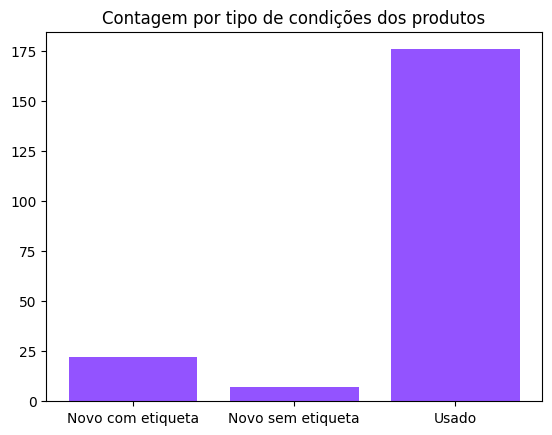

In [ ]:
plt.pyplot.bar(df_produtos['Condicao'],df_produtos['Quantidade'], color='#9353FF')
plt.pyplot.title('Contagem por tipo de condições dos produtos')
plt.pyplot.show()


Agora precisamos ranquear os produtos que mais foram pedidos por **quantidade** para entender a necessidade de um estoque de produtos na loja.

In [ ]:
sql_df('SELECT * FROM PRODUTOS').head(3)

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado


In [ ]:
sql_df('SELECT * FROM ITENS_PEDIDOS').head(3)

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0


In [ ]:
query = '''
        SELECT
            p.produto as 'nome do produto',
            SUM(ip.quantidade)
        FROM
            PRODUTOS p
        JOIN
            ITENS_PEDIDOS ip ON ip.produto_id =p.produto_id
        GROUP BY
            p.produto


'''

In [ ]:
sql_df(query).head(5)

,nome do produto,SUM(ip.quantidade)
0,Bata Pink Decote,459
1,Bermuda Acetinada Preta,363
2,Bermuda Jeans Lavagem,395
3,Bermuda Listras Bolsos,402
4,Blazer Alfaiataria Grafite,433


In [ ]:
query = '''
        SELECT
            p.produto as 'nome do produto',
            SUM(ip.quantidade)
        FROM
            PRODUTOS p
        JOIN
            ITENS_PEDIDOS ip ON ip.produto_id =p.produto_id
        GROUP BY
            p.produto
        ORDER BY
            Quantidade DESC

'''
sql_df(query)


,nome do produto,SUM(ip.quantidade)
0,Vestido Ziper Fendi,374
1,Vestido Xadrez Pb,384
2,Vestido Verde Estampa,423
3,Vestido Textura Branco,470
4,Vestido Seda Floral,428
...,...,...
196,Blazer Alfaiataria Grafite,433
197,Bermuda Listras Bolsos,402
198,Bermuda Jeans Lavagem,395
199,Bermuda Acetinada Preta,363


In [ ]:
query ='''SELECT
         p.PRODUTO,
         SUM(ip.quantidade) as  quantidade
    FROM itens_pedidos ip
    JOIN
        produtos p ON p.produto_id = ip.produto_id
    GROUP BY p.produto
    ORDER BY quantidade DESC


    '''

In [ ]:
 # só com pandas
'''df_prod_quant = itens_pedidos.merge(produtos, on='produto_id')
df_prod_quant = df_prod_quant.groupby('produto')['quantidade'].sum().reset_index()
df_prod_quant = df_prod_quant.sort_values('quantidade', ascending=True).reset_index(drop=True)
df_prod_quant'''


"df_prod_quant = itens_pedidos.merge(produtos, on='produto_id')\ndf_prod_quant = df_prod_quant.groupby('produto')['quantidade'].sum().reset_index()\ndf_prod_quant = df_prod_quant.sort_values('quantidade', ascending=True).reset_index(drop=True)\ndf_prod_quant"

In [ ]:
df_prod_quant= sql_df(query)
df_prod_quant

,produto,quantidade
0,Vestido Recortes Cores,795
1,Calca Jeans Costuras,755
2,Saia Pregas Preta,751
3,Calca Alfaiataria Preta,750
4,Saia Midi Cinto,549
...,...,...
196,Blusa Cinza,341
197,Blusa Babados Off-white,337
198,Blusa Malha Azul,325
199,Blusa Listrada Malha,322


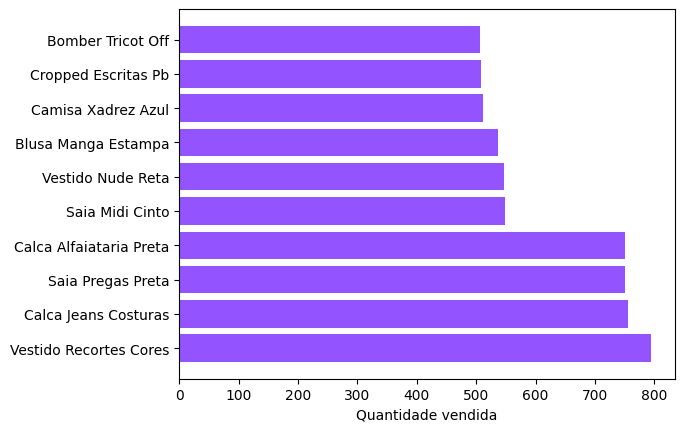

In [ ]:
plt.pyplot.barh(df_prod_quant['produto'][:10], df_prod_quant['quantidade'][:10], color='#9353FF')
plt.pyplot.xlabel('Quantidade vendida')
plt.pyplot.show()


# 3. Lidando com filtro

In [ ]:
#Extrair o ano: '%Y';
#Extrair o mês: '%m';
#Extrair o dia: '%d'.

Vamos iniciar uma análise de desempenho do **time de vendedores** da Meteora. A intenção aqui é entender como se deram as vendas dos vendedores no **ano anterior** para que possam ser aplicadas promoções e bônus salarial para a equipe no ano atual da tabela que é 2021

In [ ]:
sql_df('SELECT * FROM PEDIDOS').head(3)


,pedido_id,produto_id,vendedor_id,data_compra,total
0,341,41518,5,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600


In [ ]:
sql_df('SELECT * FROM PEDIDOS').info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pedido_id    24527 non-null  int64 
 1   produto_id   24527 non-null  int64 
 2   vendedor_id  24527 non-null  int64 
 3   data_compra  24527 non-null  object
 4   total        24527 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 958.2+ KB


Para entender o desempenho de vendas dos vendedores no ano de 2020, é preciso trabalhar com os dados que estão presentes apenas no ano de 2020.

In [ ]:
#usamos o strftime para pegar os dados conforme queremos, no caso 2020
#%Y eu só quero filtrar o ano
query ='''SELECT *
    FROM
        PEDIDOS
    WHERE strftime('%Y', data_compra) = '2020';
'''
sql_df(query)

,pedido_id,produto_id,vendedor_id,data_compra,total
0,112772,84743,3,2020-01-01,720
1,112909,56350,3,2020-01-01,1225
2,113068,70673,2,2020-01-01,1050
3,113453,16634,3,2020-01-01,2880
4,114487,43054,1,2020-01-01,640
...,...,...,...,...,...
14540,26762,9981,4,2020-12-31,8000
14541,27016,20029,3,2020-12-31,1764
14542,27666,12895,5,2020-12-31,10400
14543,28206,29893,4,2020-12-31,2100


In [ ]:
# agrupando por vendedor
query ='''SELECT
                vendedor_id, COUNT(*)
        FROM
            PEDIDOS
        WHERE
            strftime('%Y', data_compra) = '2020'
        GROUP BY
            vendedor_id;
'''
sql_df(query)

,vendedor_id,COUNT(*)
0,1,3427
1,2,3338
2,3,2782
3,4,2510
4,5,2488


In [ ]:
query ='''SELECT
                VD.NOME_VENDEDOR,
                round(AVG(PD.TOTAL),2) AS 'Valor médio por peça'
        FROM
            VENDEDORES VD
        JOIN
            PEDIDOS PD ON pd.vendedor_id = vd.vendedor_id
        WHERE
            strftime('%Y', data_compra) = '2020'
        GROUP BY
            vd.vendedor_id
        ORDER BY
           AVG(PD.TOTAL)
'''
vendedor_qty=sql_df(query)
vendedor_qty

,nome_vendedor,Valor médio por peça
0,Paulo Calanca,1813.47
1,Nadia Oliveira,1818.34
2,Ana Duarte,1843.45
3,Millena Pereira,1894.61
4,Daniel Siqueira,1972.34


## Desafio



```
# This is formatted as code
```

<font color = orange> Vamos aos desafios dessa aula, o primeiro é exibir os 10 produtos mais vendidos durante o ano de 2019, que podem ser representados em uma tabela.

In [ ]:
itens_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id_nf           24527 non-null  int64  
 1   produto_id      24527 non-null  int64  
 2   pedido_id       24527 non-null  int64  
 3   quantidade      24527 non-null  int64  
 4   valor_unitario  24527 non-null  int64  
 5   valor_total     24527 non-null  int64  
 6   Estado          24527 non-null  object 
 7   frete           24527 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 1.5+ MB


In [ ]:
produto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   produto_id  205 non-null    int64 
 1   produto     205 non-null    object
 2   preco       205 non-null    int64 
 3   marca       205 non-null    object
 4   sku         205 non-null    int64 
 5   Condicao    205 non-null    object
dtypes: int64(3), object(3)
memory usage: 9.7+ KB


In [ ]:
vendedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   vendedor_id    5 non-null      int64 
 1   nome_vendedor  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [ ]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24527 entries, 0 to 24526
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pedido_id    24527 non-null  int64 
 1   produto_id   24527 non-null  int64 
 2   vendedor_id  24527 non-null  int64 
 3   data_compra  24527 non-null  object
 4   total        24527 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 958.2+ KB


In [ ]:
query ='''SELECT
            p.produto as 'nome',
            COUNT(pd.pedido_id) as 'Quantidade'
          FROM
            produtos p
          JOIN
            pedidos pd ON p.produto_id = pd.produto_id
          WHERE
            strftime('%Y',data_compra) = '2019'
          GROUP BY
            p.produto
          ORDER BY
            Quantidade DESC;


'''
sql_df(query)

,nome,Quantidade
0,Vestido Recortes Cores,85
1,Calca Jeans Costuras,81
2,Saia Pregas Preta,73
3,Calca Alfaiataria Preta,66
4,Camisa Xadrez Azul,60
...,...,...
196,Saia Midi Tricolor,28
197,Tenis Tecido Purple,26
198,Casaco Preto Botoes,26
199,Bolsa Intrecciato Caramelo,26


In [ ]:
# 2 opção
query = '''SELECT PRODUTOS.PRODUTO, COUNT (PEDIDOS.PEDIDO_ID) AS TOTAL_PEDIDOS
FROM PEDIDOS, PRODUTOS
WHERE strftime('%Y', data_compra) = '2019' AND PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
GROUP BY PRODUTOS.PRODUTO
ORDER BY TOTAL_PEDIDOS DESC
LIMIT 10;
'''
sql_df(query)


,produto,TOTAL_PEDIDOS
0,Vestido Recortes Cores,85
1,Calca Jeans Costuras,81
2,Saia Pregas Preta,73
3,Calca Alfaiataria Preta,66
4,Camisa Xadrez Azul,60
5,Bomber Tricot Off,56
6,Shorts Bordado Branco,55
7,Blusa Manga Estampa,54
8,Saia Midi Cinto,53
9,Saia Evase Cinza,53


In [ ]:
query = '''
        SELECT
            strftime('%m',data_compra) as 'mes',
            SUM(p.total) as receita
        FROM
            pedidos p
        WHERE
            strftime('%Y',p.data_compra) = '2021'
        GROUP BY
            mes;


'''
sql_df(query)

,mes,receita
0,01,2097109
1,02,1140729
2,03,51525


# 4. Avançando nas relações

A Meteora agora deseja incrementar as suas vendas no **estado de São Paulo (SP)**, por acreditar ser uma região mais propícia às vendas já que tem uma boa concentração de pessoas e mercado também.

Mas será que São Paulo já não rende muitas vendas em relação a outros estados?

In [ ]:
query = '''SELECT ESTADO, COUNT(*) AS Pedidos
FROM ITENS_PEDIDOS
GROUP BY ESTADO
ORDER BY Pedidos DESC;
'''
sql_df(query)


,Estado,Pedidos
0,BR-MA,974
1,BR-DF,953
2,BR-MT,937
3,BR-GO,933
4,BR-PA,932
5,BR-AL,928
6,BR-PE,927
7,BR-RR,925
8,BR-RO,925
9,BR-RN,921


In [ ]:
df_group = itens_pedidos.groupby('Estado').size().reset_index(name ='Pedidos')
df_estados = df_group.sort_values('Pedidos', ascending=False).reset_index(drop=True)
df_estados

,Estado,Pedidos
0,BR-MA,974
1,BR-DF,953
2,BR-MT,937
3,BR-GO,933
4,BR-PA,932
5,BR-AL,928
6,BR-PE,927
7,BR-RO,925
8,BR-RR,925
9,BR-RN,921


Uma das ações que a Meteora pretende seguir para as vendas em SP é escolher dois de seus vendedores para que eles **foquem suas vendas** lá. Para essa escolha é interessante ter os profissionais que **mais tenham vendido** para as pessoas da região.

In [ ]:
query =''' SELECT
                p.vendedor_id, count(*) as quantidade_vendas
            FROM
                PEDIDOS P
            JOIN
                ITENS_PEDIDOS ip on ip.pedido_id = p.pedido_id
            WHERE
                ip.estado = 'BR-SP'
            GROUP BY
                p.VENDEDOR_ID
            ORDER BY
                quantidade_vendas DESC;
'''
sql_df(query)

,vendedor_id,quantidade_vendas
0,2,190
1,5,182
2,3,181
3,1,180
4,4,157


In [ ]:
# VENDEDORES QUE MAIS VENDERAM EM SP
# ADICIONAR NOME DOS VENDEDORES E AGRUPAAR POR NOME

In [ ]:
query =''' SELECT
               vd.nome_vendedor,
                count(*) as quantidade_vendas
            FROM
                PEDIDOS P
            JOIN
                VENDEDORES VD ON vd.vendedor_id =p.vendedor_id
            JOIN
                ITENS_PEDIDOS ip on ip.pedido_id = p.pedido_id
            WHERE
                ip.estado = 'BR-SP'
            GROUP BY
               vd.nome_vendedor
            ORDER BY
                quantidade_vendas DESC;
'''
sql_df(query)

,nome_vendedor,quantidade_vendas
0,Daniel Siqueira,190
1,Paulo Calanca,182
2,Nadia Oliveira,181
3,Ana Duarte,180
4,Millena Pereira,157


<font color = blue> Vendedores SP

In [ ]:
query ='''SELECT VENDEDORES.NOME_VENDEDOR, AVG(PEDIDOS.TOTAL) AS 'Valor médio por vendas'
FROM PEDIDOS, VENDEDORES
WHERE strftime('%Y',data_compra) = '2020' AND VENDEDORES.VENDEDOR_ID = PEDIDOS.VENDEDOR_ID
GROUP BY VENDEDORES.NOME_VENDEDOR
ORDER BY AVG(PEDIDOS.TOTAL) DESC; '''
sql_df(query)


,nome_vendedor,Valor médio por vendas
0,Daniel Siqueira,1972.338526
1,Millena Pereira,1894.614343
2,Ana Duarte,1843.452582
3,Nadia Oliveira,1818.342200
4,Paulo Calanca,1813.469855


In [ ]:
df_unido = pedidos.merge(vendedores, on='vendedor_id').merge(itens_pedidos, on='pedido_id')
df_filtrado = df_unido.query("Estado == 'BR-SP'")
df_vendedores_sp = df_filtrado.groupby('nome_vendedor').size().reset_index(name='quantidade_vendas')
df_vendedores_sp = df_vendedores_sp.sort_values('quantidade_vendas', ascending=False)
df_vendedores_sp


,nome_vendedor,quantidade_vendas
1,Daniel Siqueira,190
4,Paulo Calanca,182
3,Nadia Oliveira,181
0,Ana Duarte,180
2,Millena Pereira,157


## Exercicio

<font color = blue>A primeira informação é listar as marcas vendidas em São Paulo por quantidade de pedidos, que podem ser representadas em uma tabela. Já a segunda informação é publicar os produtos que são mais vendidos na época de Natal no Brasil todo. Essa última informação é aplicada a todos os estados porque somente o estado de São Paulo pode não trazer uma quantidade relevante de informações.

In [ ]:
query = '''SELECT PRODUTOS.MARCA, COUNT(*) AS 'Produtos vendidos'
FROM PRODUTOS
JOIN ITENS_PEDIDOS ON ITENS_PEDIDOS.PRODUTO_ID = PRODUTOS.PRODUTO_ID
WHERE ITENS_PEDIDOS.ESTADO = 'BR-SP'
GROUP BY PRODUTOS.MARCA
ORDER BY COUNT(ITENS_PEDIDOS.PRODUTO_ID) DESC;
'''
df_marcas_sp = sql_df(query)
df_marcas_sp


,marca,Produtos vendidos
0,Zara,100
1,Mixed,58
2,Animale,44
3,Le Lis Blanc,26
4,Banana Republic,18
...,...,...
111,Topshop,1
112,Morena Rosa,1
113,Erre Erre,1
114,Bobô,1


In [ ]:
#produtos mais vendido em DEZ no brasil
query = '''SELECT PRODUTOS.PRODUTO, COUNT(*) AS quantidade_vendas
FROM ITENS_PEDIDOS
JOIN produtos ON produtos.produto_id = ITENS_PEDIDOS.produto_id
JOIN PEDIDOS ON PEDIDOS.PEDIDO_ID = ITENS_PEDIDOS.PEDIDO_ID
WHERE strftime('%m',PEDIDOS.data_compra)= '12'
GROUP BY produtos.produto
ORDER BY quantidade_vendas DESC;
'''
sql_df(query)


,produto,quantidade_vendas
0,Vestido Recortes Cores,30
1,Vestido Preto Franzido,26
2,Calca Jeans Costuras,26
3,Calca Alfaiataria Preta,26
4,Camisa Xadrez Azul,25
...,...,...
196,Sneaker Monograma Bege,6
197,Casaqueto Estampa Geometrica,6
198,Regata Renda Branca,5
199,Body Estampa Coracoes,5


# MySQL com SQLAlchemy

In [ ]:
!pip install SQLAlchemy


In [ ]:
from sqlalchemy import create_engine

# Configuração da conexão com o banco de dados
user = 'seu_usuario'
password = 'sua_senha'
host = 'localhost'
database = 'nome_do_banco_de_dados'

# Criar uma string de conexão
connection_string = f'mysql+mysqlconnector://{user}:{password}@{host}/{database}'

# Criar o engine de conexão
engine = create_engine(connection_string)

# Estabelecer a conexão
conn = engine.connect()

# A partir daqui, podemos executar consultas ou operações no banco de dados
## […]

# Fechar a conexão quando terminar
conn.close()


# MySQL com mysql-connector

In [ ]:
!pip install mysql-connector-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.8/409.8 kB 40.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.21.12 which is incompatible.


In [ ]:
import mysql.connector

# Configuração da conexão com o banco de dados
HOST = 'localhost'
USERNAME = 'seu_usuario'
PASSWORD = 'sua_senha'
DATABASE = 'nome_do_banco_de_dados'

# Estabelecer a conexão
connection = mysql.connector.connect(
host= HOST,
user= USERNAME,
password= PASSWORD,
database= DATABASE
)

# Testar estabelecimento de conexão
if not(connection.is_connected()):
    print("Não conectado com MySQL Server")

# A partir daqui, podemos executar consultas ou operações no banco de dados
## […]

# Fechar a conexão quando terminar
conn.close()


# PostgreSQL

In [ ]:
!pip install SQLAlchemy


In [ ]:
from sqlalchemy import create_engine

# Configuração da conexão com o banco de dados
user = 'seu_usuario'
password = 'sua_senha'
host = 'localhost'
database = 'nome_do_banco_de_dados'

# Criar uma string de conexão
connection_string = f'postgresql://{user}:{password}@{host}/{database}'

# Criar o engine de conexão
engine = create_engine(connection_string)

# Estabelecer a conexão
conn = engine.connect()

# A partir daqui, podemos executar consultas ou operações no banco de dados
## […]

# Fechar a conexão quando terminar
conn.close()
